In [1]:
%run ../../bin/imports.ipynb

In [2]:
import statistics


## Pan-cancer analysis

In [3]:
data_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/pancancer.merged_data.tab', 
                 sep='\t')
data_df['Has_HLALOH'] = ~data_df['Alleles_lost'].isnull()

In [4]:
len(data_df)

609

In [5]:
columns = list(data_df.columns)

In [6]:
# Cancer types with at least 10 patients with HLA LOH
cancer_types = list(data_df[data_df.Has_HLALOH].Cancer_type.value_counts()
                    [data_df[data_df.Has_HLALOH].Cancer_type.value_counts() >= 8].index)
print(len(cancer_types))

# All cancer types
len(data_df.Cancer_type.unique())
print(data_df.Cancer_type.unique())

7
['Bladder' 'Melanoma' 'Colorectal' 'Pancreatic' 'Uterine' 'Head_Neck'
 'Cervical' 'NSCLC_SCC' 'Liver' 'NSCLC_adenocarcinoma' 'Breast' 'Thyroid'
 'Kidney_RCC' 'Ovarian' 'Lung-LCC']


### Cohort summary figures

In [7]:
columns[:10]

['sample_name_tumor',
 'AJCC_UICC_Stage_Group',
 'Cancer_type',
 'Simple_Stage',
 'purity',
 'MATH',
 'MSI_percentage',
 'Cytolytic_score',
 'CD274',
 'CASP8']

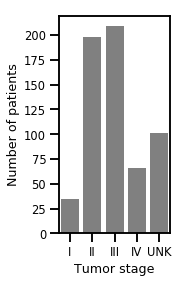

In [8]:
plt.figure(figsize=(2, 4))
sns.set_context('talk', font_scale=0.7)

sns.countplot(x='Simple_Stage', data=data_df,
             order=['I', 'II', 'III', 'IV', 'UNK'],
             color='grey')
plt.ylabel('Number of patients')
plt.xlabel('Tumor stage')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.tumor_stage.2021_06_25.pdf',
           bbox_inches='tight')

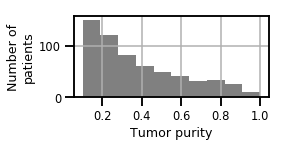

In [9]:
plt.figure(figsize=(3.5, 1.5))
sns.set_context('talk', font_scale=0.7)

data_df.purity.hist(color='grey')
plt.ylabel('Number of\npatients')
plt.xlabel('Tumor purity')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.tumor_purity.2021_06_25.pdf',
           bbox_inches='tight')

In [10]:
data_df.purity.median()

0.31

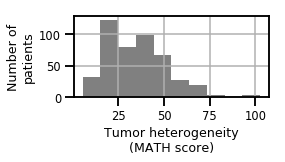

In [11]:
plt.figure(figsize=(3.5, 1.5))
sns.set_context('talk', font_scale=0.7)

data_df.MATH.hist(color='grey')
plt.ylabel('Number of\npatients')
plt.xlabel('Tumor heterogeneity\n(MATH score)')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.heterogeneity.2021_06_25.pdf',
           bbox_inches='tight')

In [12]:
data_df.MATH.median()

32.78449412

In [13]:
data_df.head()

sample_name_tumor AJCC_UICC_Stage_Group Cancer_type Simple_Stage  purity  \
0     DNA_S000460823                    II     Bladder           II    0.59   
1   DNA_D00689998_A1                    IV    Melanoma           IV    0.39   
2   DNA_D00689957_A1                   III  Colorectal          III    0.50   
3  DNA_D00689946_A2a                   III  Pancreatic          III    0.16   
4     DNA_S000465410                    II     Uterine           II    0.31   

   MATH  MSI_percentage  Cytolytic_score    CD274    CASP8  ...  Focal_cnvs  \
0   NaN            0.03         7.313060   7.6641  29.6656  ...        33.0   
1   NaN            0.00         2.910320   2.4225  13.2090  ...        22.0   
2   NaN            0.65         4.947471  12.9711  22.0157  ...        43.0   
3   NaN            0.00         9.277136  15.6070  16.9710  ...        30.0   
4   NaN            0.88        11.480447   5.8557  15.0401  ...        13.0   

   Large_CNVs  LOH_region  Potential_neoantigens  Potential_neoepitopes  \
0        58.0    0.196398                   45.0                 2981.0   
1        53.0    0.229302                  927.0                34664.0   
2        62.0    0.137267                  129.0                 4787.0   
3        50.0    0.140063                   44.0                 1485.0   
4        45.0    0.034222                  385.0                19175.0   

   BINDING_antigen_strong_count BINDING_epitope_strong_count  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

   PRESENTATION_antigen_strong_count  PRESENTATION_epitope_strong_count  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   Has_HLALOH  
0       False  
1       False  
2        True  
3       False  
4       False  

[5 rows x 749 columns]

In [14]:
# Saving source data
panel_name = 'supp_figure_17abc'
data_df[['Cancer_type', 'Simple_Stage', 'purity', 'MATH']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

In [15]:
data_df['Allele_lost_A'] = data_df['Alleles_lost'].str.contains('A').fillna(False).astype(int)
data_df['Allele_lost_B'] = data_df['Alleles_lost'].str.contains('B').fillna(False).astype(int)
data_df['Allele_lost_C'] = data_df['Alleles_lost'].str.contains('C').fillna(False).astype(int)


In [16]:
lost_alleles_list = list(data_df['Alleles_lost'])

lost_allele_counter = {}

for sample in lost_alleles_list:
    if type(sample) is not float:
#         print(sample)
        allele_list = sample.split(',')
        for allele in allele_list:
            if allele not in lost_allele_counter:
                lost_allele_counter[allele] = 1
            else:
                lost_allele_counter[allele] = lost_allele_counter[allele] + 1
                
# print(lost_allele_counter)


kept_alleles_list = list(data_df['Alleles_retained'])

kept_allele_counter = {}

for sample in kept_alleles_list:
    if type(sample) is not float:
#         print(sample)
        allele_list = sample.split(',')
        for allele in allele_list:
            if allele not in kept_allele_counter:
                kept_allele_counter[allele] = 1
            else:
                kept_allele_counter[allele] = kept_allele_counter[allele] + 1
                
# print(kept_allele_counter)


In [17]:
# get list of all unique alleles to use as column in new dataframe
unique_alleles = []
for allele in lost_allele_counter:
    if allele not in unique_alleles:
        unique_alleles.append(allele)
for allele in kept_allele_counter:
    if allele not in unique_alleles:
        unique_alleles.append(allele)

print(len(unique_alleles))

allele_dataframe = pd.DataFrame()
allele_dataframe['Allele'] = unique_alleles

def get_lost(row, lost_alleles):
    lost_allele_count = 0
    if row['Allele'] in lost_alleles:
        lost_allele_count = lost_alleles[row['Allele']]
    return lost_allele_count

def get_kept(row, kept_alleles):
    kept_allele_count = 0
    if row['Allele'] in kept_alleles:
        kept_allele_count = kept_alleles[row['Allele']]
    return kept_allele_count

def get_total(row):
    total = row['Lost_count'] + row['Kept_count']
    return total

def get_frequency_lost_allele(row):    
    try:
        frequency = row['Lost_count']/row['Total_allele_count']
    except Exception as e:
        frequency = 0
    return frequency
    
def get_frequency_of_allele(row):
    try:
        frequency = row['Total_allele_count']/row['Total_count']
    except Exception as e:
        frequency = 0
    return frequency

# counts
allele_dataframe['Lost_count'] = allele_dataframe.apply(lambda row: get_lost(row, lost_allele_counter), axis=1)
allele_dataframe['Kept_count'] = allele_dataframe.apply(lambda row: get_kept(row, kept_allele_counter), axis=1)

# count total # of each allele that "exists"
allele_list = list(allele_dataframe['Allele'])
total_allele_counts = []

for allele in allele_list:
    try:
        allele_exists_column = F"{allele}_exists"
        total_allele_count = np.nansum(list(data_df[allele_exists_column]))
#         print(list(data_df[allele_exists_column]))
        total_allele_counts.append(total_allele_count)
    except Exception as e:
        total_allele_counts.append(0)
        print(e)
allele_dataframe['Total_allele_count'] = total_allele_counts

# add list to allele_dataframe['total_allele_count']

allele_dataframe['Total_count'] = sum(list(allele_dataframe['Total_allele_count']))
# frequencies
allele_dataframe['Lost_allele_frequency'] = allele_dataframe.apply(lambda row: get_frequency_lost_allele(row), axis=1)
allele_dataframe['Allele_frequency'] = allele_dataframe.apply(lambda row: get_frequency_of_allele(row), axis=1)

# print(max(allele_dataframe['Total_frequency']))

allele_dataframe.head()


168
'A*02:13_exists'
'A*01:22_exists'


Allele  Lost_count  Kept_count  Total_allele_count  Total_count  \
0  A*32:01           5          24                31.0       3434.0   
1  B*53:01           1           7                 9.0       3434.0   
2  C*04:01           9         105               123.0       3434.0   
3  A*23:01           1          14                15.0       3434.0   
4  A*31:01           7          21                28.0       3434.0   

   Lost_allele_frequency  Allele_frequency  
0               0.161290          0.009027  
1               0.111111          0.002621  
2               0.073171          0.035818  
3               0.066667          0.004368  
4               0.250000          0.008154

In [18]:
# get only the datapoints w/ a frequency & not 0
# frequency_allele_dataframe = allele_dataframe[allele_dataframe['Lost_allele_frequency'] != 0]
frequency_allele_dataframe = allele_dataframe

# get only datapoints w/ a total_allele_count of >= median(all total_allele_counts)
count_cutoff = statistics.median(list(frequency_allele_dataframe['Total_allele_count']))
print(count_cutoff)
frequency_allele_dataframe = frequency_allele_dataframe[frequency_allele_dataframe['Total_allele_count'] >= count_cutoff]
frequency_allele_dataframe = frequency_allele_dataframe.reset_index()
frequency_allele_dataframe = frequency_allele_dataframe.sort_values("Allele_frequency", ascending=False)
frequency_allele_dataframe.head()

6.0


index   Allele  Lost_count  Kept_count  Total_allele_count  Total_count  \
13     15  A*02:01          12         175               235.0       3434.0   
6       7  C*07:02          11         119               140.0       3434.0   
9      11  A*24:02           8         113               133.0       3434.0   
2       2  C*04:01           9         105               123.0       3434.0   
8      10  C*06:02          11          96               117.0       3434.0   

    Lost_allele_frequency  Allele_frequency  
13               0.051064          0.068433  
6                0.078571          0.040769  
9                0.060150          0.038730  
2                0.073171          0.035818  
8                0.094017          0.034071

0.16612397913597002


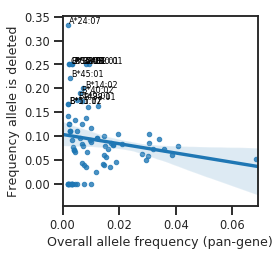

In [19]:
plt.figure(figsize=(3.5, 3.5))
sns.set_context('talk', font_scale=0.7)


frequency_mean = statistics.mean(list(frequency_allele_dataframe['Lost_allele_frequency']))
# frequency_pvar = statistics.pvariance(list(frequency_allele_dataframe['Lost_allele_frequency']))
# where do we want this cutoff to be?
# frequency_cutoff = frequency_mean 

frequency_median = statistics.median(list(frequency_allele_dataframe['Lost_allele_frequency']))
frequency_stdev = statistics.stdev(list(frequency_allele_dataframe['Lost_allele_frequency']))
frequency_cutoff = frequency_mean + frequency_stdev
print(frequency_cutoff)

sns.set_context('talk', font_scale=0.7)
sns.set_style("ticks")

ax = sns.regplot(data=frequency_allele_dataframe, x="Allele_frequency", y="Lost_allele_frequency",
                marker='.')
ax.set(xlim=(0, 0.069))
#plt.xticks(rotation=30)
plt.xlabel('Overall allele frequency (pan-gene)')
plt.ylabel('Frequency allele is deleted')

for i in range(frequency_allele_dataframe.shape[0]):
    if frequency_allele_dataframe.Lost_allele_frequency[i] > frequency_cutoff:
        plt.text(x=frequency_allele_dataframe.Allele_frequency[i]+0.0006,y=frequency_allele_dataframe.Lost_allele_frequency[i]+0.001,s=frequency_allele_dataframe.Allele[i], 
                fontdict=dict(color='black',size=8))

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.frequency_of_deletion.2021_06_25.pdf',
           bbox_inches='tight')

In [20]:
# Saving source data
panel_name = 'supp_figure_17e'
frequency_allele_dataframe[['Allele', 'Lost_count', 'Total_allele_count', 'Lost_allele_frequency', 
                            'Allele_frequency']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

### Frequency across tumor types

In [21]:
data_df.Has_HLALOH.mean()

0.17898193760262726

In [22]:
data_df.columns

Index(['sample_name_tumor', 'AJCC_UICC_Stage_Group', 'Cancer_type',
       'Simple_Stage', 'purity', 'MATH', 'MSI_percentage', 'Cytolytic_score',
       'CD274', 'CASP8',
       ...
       'Potential_neoantigens', 'Potential_neoepitopes',
       'BINDING_antigen_strong_count', 'BINDING_epitope_strong_count',
       'PRESENTATION_antigen_strong_count',
       'PRESENTATION_epitope_strong_count', 'Has_HLALOH', 'Allele_lost_A',
       'Allele_lost_B', 'Allele_lost_C'],
      dtype='object', length=752)

In [23]:
total_df = data_df.Cancer_type.value_counts().reset_index()
total_df.columns = ['Cancer_type', 'Total_patients']

In [24]:
loh_df = data_df[data_df.Has_HLALOH].Cancer_type.value_counts().reset_index()
loh_df.columns = ['Cancer_type', 'HLALOH_patients']

In [25]:
freq_df = pd.merge(total_df, loh_df, on='Cancer_type', how='left').fillna(0)

In [26]:
freq_df['Fraction'] = freq_df['HLALOH_patients'] / freq_df['Total_patients']

In [27]:
cancer_type_map = {'Cervical': 'Cervical', 'Head_Neck': 'HNSCC', 'NSCLC_SCC': 'NSCLC-SCC',
                   'NSCLC_adenocarcinoma': 'NSCLC-A', 'Pancreatic': 'Pancreatic',
                   'Bladder': 'Blader', 'Colorectal': 'Colorectal', 'Kidney_RCC': 'Kidney',
                   'Breast': 'Breast', 'Melanoma': 'Melanoma', 'Ovarian': 'Ovarian',
                   'Uterine': 'Uterine', 'Liver':'Liver'}

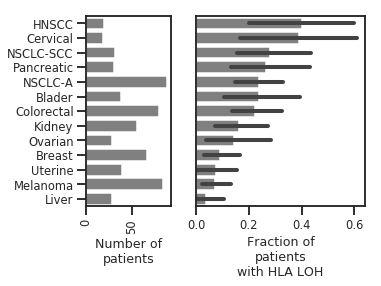

In [28]:
size_constraint = freq_df.Total_patients > 10

plt.figure(figsize=(5, 3.5))
sns.set_context('talk', font_scale=0.7)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 


ax0 = plt.subplot(gs[1])
sns.barplot(y='Cancer_type', x='Has_HLALOH', data=data_df, color='grey', 
            order=freq_df[size_constraint].sort_values('Fraction', ascending=False).Cancer_type, ax = ax0)
plt.xlabel('Fraction of\npatients\nwith HLA LOH')
plt.yticks([])
plt.ylabel('')

ax1 = plt.subplot(gs[0])
sns.barplot(y='Cancer_type', x='Total_patients', data=freq_df, color='grey', 
            order=freq_df[size_constraint].sort_values('Fraction', ascending=False).Cancer_type, ax=ax1)
plt.xticks(rotation=90)
plt.xlabel('Number of\npatients')
ax1.set(yticklabels=[cancer_type_map[x] for x in 
                     list(freq_df[size_constraint].sort_values('Fraction', ascending=False).Cancer_type)])
plt.ylabel('')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.frequency_of_hlaloh.2021_06_25.pdf',
           bbox_inches='tight')

In [29]:
data_df[['Cancer_type', 'Has_HLALOH']]

Cancer_type  Has_HLALOH
0                 Bladder       False
1                Melanoma       False
2              Colorectal        True
3              Pancreatic       False
4                 Uterine       False
5               Head_Neck        True
6                Cervical       False
7               NSCLC_SCC       False
8                   Liver       False
9    NSCLC_adenocarcinoma       False
10                Uterine       False
11   NSCLC_adenocarcinoma       False
12             Pancreatic       False
13                Bladder        True
14                 Breast       False
15   NSCLC_adenocarcinoma       False
16             Colorectal       False
17   NSCLC_adenocarcinoma       False
18                Uterine       False
19                 Breast       False
20               Melanoma       False
21                Thyroid       False
22             Kidney_RCC       False
23   NSCLC_adenocarcinoma       False
24                Thyroid       False
25                  Liver        True
26             Pancreatic       False
27                Bladder        True
28                Ovarian        True
29             Kidney_RCC       False
..                    ...         ...
579              Melanoma       False
580              Melanoma       False
581              Melanoma       False
582              Melanoma       False
583              Melanoma       False
584              Melanoma       False
585              Melanoma       False
586              Melanoma       False
587              Melanoma       False
588              Melanoma       False
589              Melanoma       False
590              Melanoma       False
591              Melanoma       False
592              Melanoma       False
593              Melanoma       False
594              Melanoma       False
595              Melanoma       False
596              Melanoma       False
597              Melanoma       False
598              Melanoma        True
599              Melanoma        True
600              Melanoma       False
601              Melanoma       False
602              Melanoma       False
603              Melanoma       False
604              Melanoma       False
605              Melanoma       False
606              Melanoma       False
607              Melanoma       False
608              Melanoma       False

[609 rows x 2 columns]

In [30]:
# Saving source data
panel_name = 'figure_5a'
data_df[['Cancer_type', 'Has_HLALOH']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

In [31]:
freq_df.Total_patients.sum()

609

In [32]:
freq_df.sort_values('Fraction')

Cancer_type  Total_patients  HLALOH_patients  Fraction
13               Thyroid               2              0.0  0.000000
14              Lung-LCC               1              0.0  0.000000
9                  Liver              28              1.0  0.035714
1               Melanoma              84              6.0  0.071429
5                Uterine              39              3.0  0.076923
3                 Breast              66              6.0  0.090909
10               Ovarian              28              4.0  0.142857
4             Kidney_RCC              55              9.0  0.163636
2             Colorectal              80             18.0  0.225000
6                Bladder              38              9.0  0.236842
0   NSCLC_adenocarcinoma              88             21.0  0.238636
8             Pancreatic              30              8.0  0.266667
7              NSCLC_SCC              32              9.0  0.281250
12              Cervical              18              7.0  0.388889
11             Head_Neck              20              8.0  0.400000

In [33]:
freq_df.columns = ['Cancer Type', 'Total Patients', 'Patients with HLA LOH', 'Fraction of Patients with HLA LOH']

In [34]:
# Save table to file
freq_df.sort_values('Fraction of Patients with HLA LOH', ascending=False).to_excel('/rnd/users/rpyke/data/00-DASH/tables/Table_S5_hla_loh_frequencies.xlsx', index=None)


In [35]:
# Update
8 / 13

0.6153846153846154

### Check # of alleles lost if starting with only heterozygous patients

In [36]:
data_df['Allele_lost_A'] = data_df['Alleles_lost'].str.contains('A').fillna(False).astype(int)
data_df['Allele_lost_B'] = data_df['Alleles_lost'].str.contains('B').fillna(False).astype(int)
data_df['Allele_lost_C'] = data_df['Alleles_lost'].str.contains('C').fillna(False).astype(int)

In [37]:
# restrict to fully heterozygous alleles
heterozygous_data_df = data_df[data_df.Alleles_homozygous.isna()]

In [38]:
gene_count_df = heterozygous_data_df[['Allele_lost_A', 'Allele_lost_B', 'Allele_lost_C']].sum(axis=1) \
                        .value_counts().reset_index()
gene_count_df.columns = ['Number of HLA genes with LOH', 'Number of patients']

In [39]:
gene_count_df.head()

Number of HLA genes with LOH  Number of patients
0                             0                 354
1                             3                  65
2                             1                  17
3                             2                   3

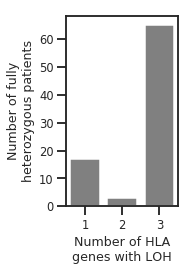

In [40]:
plt.figure(figsize=(2, 3.5))
sns.set_context('talk', font_scale=0.7)
sns.barplot(x='Number of HLA genes with LOH', y='Number of patients', data=gene_count_df,
           order=[1, 2, 3], color='grey')
plt.xticks(rotation=0)
plt.ylabel('Number of fully\nheterozygous patients')
plt.xlabel('Number of HLA\ngenes with LOH')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.number_of_genes_impacted.2021_06_25.pdf',
           bbox_inches='tight')

In [41]:
# Saving source data
panel_name = 'figure_5b'
data_df[['Allele_lost_A', 'Allele_lost_B', 'Allele_lost_C']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

In [42]:
print(65 / (65+17+3))
print(3 / (65+17+3))
print(18 / (65+17+3))

0.7647058823529411
0.03529411764705882
0.21176470588235294


In [43]:
gene_specific_df = heterozygous_data_df[['Allele_lost_A', 'Allele_lost_B', 'Allele_lost_C']].sum().reset_index()

In [44]:
gene_specific_df['Gene'] = gene_specific_df['index'].str.split('_').str[2]

In [45]:
gene_specific_df.columns = ['index', 'Number_lost', 'Gene']

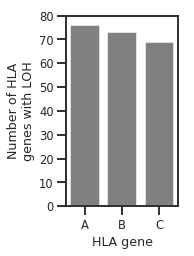

In [46]:
plt.figure(figsize=(2, 3.5))
sns.set_context('talk', font_scale=0.7)
sns.barplot(x='Gene', y='Number_lost', data=gene_specific_df,
           order=['A', 'B', 'C'], color='grey')
plt.xticks(rotation=0)
plt.ylabel('Number of HLA\ngenes with LOH')
plt.xlabel('HLA gene')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.which_genes_impacted.2021_06_25.pdf',
           bbox_inches='tight')

In [47]:
# Saving source data
panel_name = 'supp_figure_17d'
data_df[['Allele_lost_A', 'Allele_lost_B', 'Allele_lost_C']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

### CNV

In [48]:
green = '#77c722'
blue = '#3864b5'

In [49]:
len(data_df)

609

In [50]:
print('Pan-cancer:', sp.mannwhitneyu(data_df[data_df.Has_HLALOH].LOH_region,
               data_df[~data_df.Has_HLALOH].LOH_region))
print('With HLA LOH:', data_df[data_df.Has_HLALOH].LOH_region.median())
print('Without HLA LOH:', data_df[~data_df.Has_HLALOH].LOH_region.median())


for tumor_type in cancer_types:
    print(tumor_type, sp.mannwhitneyu(data_df[(data_df.Cancer_type == tumor_type)&data_df.Has_HLALOH].LOH_region,
           data_df[(data_df.Cancer_type == tumor_type)&~data_df.Has_HLALOH].LOH_region)[1]*len(cancer_types))


Pan-cancer: MannwhitneyuResult(statistic=12019.0, pvalue=2.835306561035477e-20)
With HLA LOH: 0.280441234375
Without HLA LOH: 0.1445645175
NSCLC_adenocarcinoma 0.0084282007223309
Colorectal 0.0015781147951099968
Kidney_RCC 0.0006979597510717297
Bladder 0.007855552473674522
NSCLC_SCC 0.010227182034080328
Head_Neck 1.6225806402093652
Pancreatic 0.161853385521899


In [51]:
data_df['HLA LOH'] = data_df['Has_HLALOH']

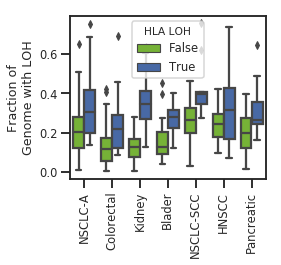

In [52]:
plt.figure(figsize=(3.5, 3))
sns.set_context('talk', font_scale=0.7)
g = sns.boxplot(x='Cancer_type', y='LOH_region', hue='HLA LOH', data=data_df, palette=[green, blue],
            order=cancer_types)
plt.xticks(rotation=90)
plt.ylabel('Fraction of\nGenome with LOH')
#plt.ylim(50, 200)
#plt.legend([])
g.set(xticklabels=[cancer_type_map[x] for x in cancer_types])
plt.xlabel('')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.fraction_of_genome_LOH.2021_06_25.pdf',
           bbox_inches='tight')

In [53]:
# Saving source data
panel_name = 'figure_5c'
data_df[['Cancer_type', 'LOH_region', 'HLA LOH']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

Patient-specific analysis

In [54]:
cnv_category = 'LOH_region'

In [55]:
total_length = 3200000000

In [56]:
hla_gene_length = 3000

In [57]:
hla_gene_length / total_length

9.375e-07

In [58]:
sp.mannwhitneyu(list(data_df[cnv_category]),
               list(data_df['HLA LOH'].astype(int)))

MannwhitneyuResult(statistic=66272.0, pvalue=1.975351072417448e-90)

In [59]:
data_df['HLA LOH'].astype(int).mean()

0.17898193760262726

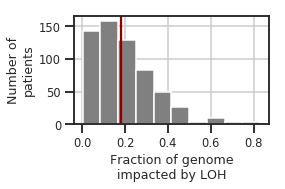

In [60]:
plt.figure(figsize=(3.5, 2))

data_df[cnv_category].hist(color='grey')

plt.axvline(data_df['HLA LOH'].astype(int).mean(), color='darkred')

plt.xlabel('Fraction of genome\nimpacted by LOH')
plt.ylabel('Number of\npatients')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.fraction_LOH_and_HLALOH_pancancer.2021_06_25.pdf',
           bbox_inches='tight')

In [61]:
data_df['HLA LOH'].astype(int).mean()

0.17898193760262726

In [62]:
data_df[cnv_category].median()

0.17121542609375

In [63]:
# Saving source data
panel_name = 'supp_figure_18a'
data_df[cnv_category].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None, header=None)

Tumor-type specific analysis

In [64]:
cnv_category = 'LOH_region'
cnv_freq_df = pd.DataFrame(data_df.groupby('Cancer_type')[cnv_category].median().sort_values()).reset_index()

In [65]:
cnv_freq_df.head()

Cancer_type  LOH_region
0     Uterine    0.048719
1     Thyroid    0.110709
2  Colorectal    0.126482
3    Melanoma    0.139147
4  Kidney_RCC    0.140382

In [66]:
freq_df.head()

Cancer Type  Total Patients  Patients with HLA LOH  \
0  NSCLC_adenocarcinoma              88                   21.0   
1              Melanoma              84                    6.0   
2            Colorectal              80                   18.0   
3                Breast              66                    6.0   
4            Kidney_RCC              55                    9.0   

   Fraction of Patients with HLA LOH  
0                           0.238636  
1                           0.071429  
2                           0.225000  
3                           0.090909  
4                           0.163636

In [67]:
freq_df['Cancer_type'] = freq_df['Cancer Type']
freq_df['Fraction'] = freq_df['Fraction of Patients with HLA LOH']
merged_freq_df = pd.merge(cnv_freq_df, freq_df, on='Cancer_type')
merged_freq_df_high_freq = merged_freq_df[merged_freq_df.Cancer_type.isin(cancer_types)]


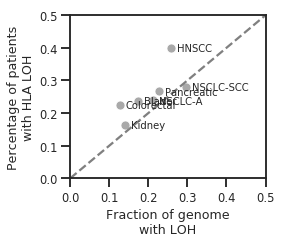

In [68]:
plt.figure(figsize=(3.5, 3))
sns.set_context('talk', font_scale=0.7)
plt.plot((0, 0.5), (0, 0.5), '--', color='grey')

ax = sns.scatterplot(x=cnv_category, y='Fraction', 
                     data=merged_freq_df_high_freq, color='darkgrey')

for i, txt in enumerate(range(len(merged_freq_df_high_freq))):
    ax.annotate(cancer_type_map[list(merged_freq_df_high_freq.Cancer_type)[i]], 
                (list(merged_freq_df_high_freq[cnv_category])[i]+0.015, 
                 list(merged_freq_df_high_freq.Fraction)[i]-0.01), size=10)
plt.xlabel('Fraction of genome\nwith LOH')
plt.ylabel('Percentage of patients\nwith HLA LOH')
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.fraction_LOH_and_HLALOH.2021_06_25.pdf',
           bbox_inches='tight')

In [69]:
# Saving source data
panel_name = 'figure_5d'
merged_freq_df_high_freq[['Cancer_type', 'LOH_region', 'Fraction of Patients with HLA LOH', 
                          'Total Patients', 'Patients with HLA LOH']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

### TMB

Pan-cancer: MannwhitneyuResult(statistic=23040.5, pvalue=0.005722805143241586)
With HLA LOH: 305.0373831775701
Without HLA LOH: 293.2309236947791
NSCLC_adenocarcinoma 0.04330538817996299
Colorectal 1.8815749789140894
Kidney_RCC 2.963204976631291
Bladder 2.0394348047417195
NSCLC_SCC 1.7119602025169727
Head_Neck 2.156102226412875
Pancreatic 0.045197734563621035


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

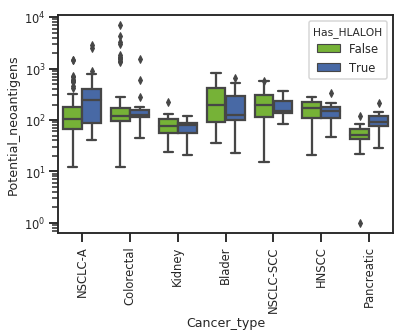

In [70]:
print('Pan-cancer:', sp.mannwhitneyu(data_df[data_df.Has_HLALOH].Potential_neoantigens,
               data_df[~data_df.Has_HLALOH].Potential_neoantigens))
print('With HLA LOH:', data_df[data_df.Has_HLALOH].Potential_neoantigens.dropna().mean())
print('Without HLA LOH:', data_df[~data_df.Has_HLALOH].Potential_neoantigens.dropna().mean())


for tumor_type in cancer_types:
    print(tumor_type, sp.mannwhitneyu(data_df[(data_df.Cancer_type == tumor_type)&data_df.Has_HLALOH].Potential_neoantigens,
           data_df[(data_df.Cancer_type == tumor_type)&~data_df.Has_HLALOH].Potential_neoantigens)[1]*len(cancer_types))

g = sns.boxplot(x='Cancer_type', y='Potential_neoantigens', hue='Has_HLALOH', data=data_df,
           order=cancer_types, palette=[green, blue])
g.set_yscale("log")
g.set(xticklabels=[cancer_type_map[x] for x in cancer_types])

plt.xticks(rotation=90)

Pan-cancer: MannwhitneyuResult(statistic=23694.0, pvalue=0.016323962241835337)
With HLA LOH: 58.5375
Without HLA LOH: 54.87403598971722
NSCLC_adenocarcinoma MannwhitneyuResult(statistic=570.0, pvalue=0.09642255514456127)
Colorectal MannwhitneyuResult(statistic=473.5, pvalue=0.166507232133218)
Kidney_RCC MannwhitneyuResult(statistic=206.0, pvalue=0.49545614967095536)
Bladder MannwhitneyuResult(statistic=109.5, pvalue=0.24073314724560774)
NSCLC_SCC MannwhitneyuResult(statistic=55.5, pvalue=0.023217704244630218)
Head_Neck MannwhitneyuResult(statistic=41.5, pvalue=0.321652016554505)
Pancreatic MannwhitneyuResult(statistic=74.0, pvalue=0.26279647702382475)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

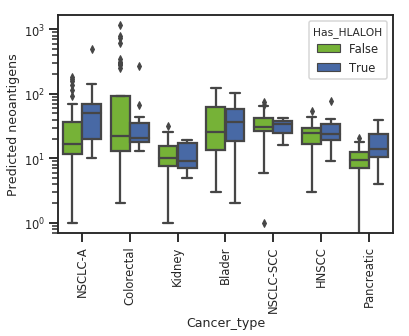

In [71]:
print('Pan-cancer:', sp.mannwhitneyu(data_df[data_df.Has_HLALOH].BINDING_antigen_strong_count,
               data_df[~data_df.Has_HLALOH].BINDING_antigen_strong_count))
print('With HLA LOH:', data_df[data_df.Has_HLALOH].BINDING_antigen_strong_count.dropna().mean())
print('Without HLA LOH:', data_df[~data_df.Has_HLALOH].BINDING_antigen_strong_count.dropna().mean())

for tumor_type in cancer_types:
    print(tumor_type, sp.mannwhitneyu(data_df[(data_df.Cancer_type == tumor_type)&data_df.Has_HLALOH].BINDING_antigen_strong_count,
           data_df[(data_df.Cancer_type == tumor_type)&~data_df.Has_HLALOH].BINDING_antigen_strong_count))

g = sns.boxplot(x='Cancer_type', y='BINDING_antigen_strong_count', hue='Has_HLALOH', data=data_df,
           order=cancer_types, palette=[green, blue])
g.set_yscale("log")
plt.ylabel('Predicted neoantigens')
g.set(xticklabels=[cancer_type_map[x] for x in cancer_types])

plt.xticks(rotation=90)

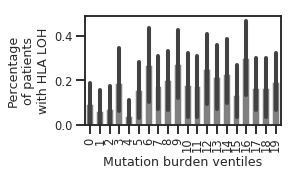

In [72]:
plt.figure(figsize=(3.5, 2))

tmb_df = data_df[['Potential_neoantigens', 'Has_HLALOH']].dropna()
tmb_df['Percentile'] = pd.qcut(tmb_df['Potential_neoantigens'], 20, labels=False)

sns.barplot(x='Percentile', y='Has_HLALOH', data=tmb_df, color='grey')
plt.xticks(rotation=90)
plt.xlabel('Mutation burden ventiles')
plt.ylabel('Percentage\nof patients\nwith HLA LOH')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.tmb_goldilocks.2021_06_25.pdf',
           bbox_inches='tight')

In [73]:
# Saving source data
panel_name = 'supp_figure_18e'
tmb_df.to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

### Expression

Pan-cancer: MannwhitneyuResult(statistic=22912.0, pvalue=0.004580912734247475)
With HLA LOH: 14.2038
Without HLA LOH: 10.9557
NSCLC_adenocarcinoma 0.36455976506516596
Colorectal 0.1640381405218025
Kidney_RCC 3.2778666140028725
Bladder 3.0229245407346403
NSCLC_SCC 2.050453470943734
Head_Neck 2.754977786578909
Pancreatic 1.8432895652546475


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

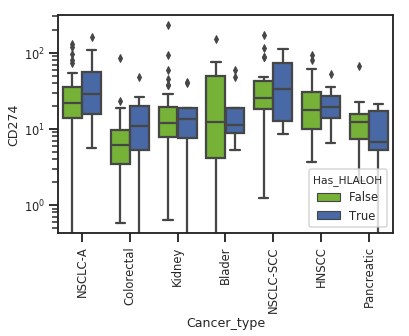

In [74]:
# CD274 score
print('Pan-cancer:', sp.mannwhitneyu(data_df[data_df.Has_HLALOH].CD274,
               data_df[~data_df.Has_HLALOH].CD274))
print('With HLA LOH:', data_df[data_df.Has_HLALOH].CD274.median())
print('Without HLA LOH:', data_df[~data_df.Has_HLALOH].CD274.median())

for tumor_type in cancer_types:
    print(tumor_type, sp.mannwhitneyu(data_df[(data_df.Cancer_type == tumor_type)&data_df.Has_HLALOH].CD274,
           data_df[(data_df.Cancer_type == tumor_type)&~data_df.Has_HLALOH].CD274)[1]*len(cancer_types))

g = sns.boxplot(x='Cancer_type', y='CD274', hue='Has_HLALOH', data=data_df,
           order=cancer_types, palette=[green, blue])
g.set(xticklabels=[cancer_type_map[x] for x in cancer_types])
g.set_yscale("log")

plt.xticks(rotation=90)

### MSI

Pan-cancer: MannwhitneyuResult(statistic=22974.5, pvalue=0.004521718405260812)
With HLA LOH: 0.08
Without HLA LOH: 0.03
NSCLC_adenocarcinoma MannwhitneyuResult(statistic=643.5, pvalue=0.27219854955943107)
Colorectal MannwhitneyuResult(statistic=477.0, pvalue=0.17499319956632292)
Kidney_RCC MannwhitneyuResult(statistic=82.5, pvalue=0.0007145482119161073)
Bladder MannwhitneyuResult(statistic=121.0, pvalue=0.3777707081467909)
NSCLC_SCC MannwhitneyuResult(statistic=64.0, pvalue=0.047425205125439705)
Head_Neck MannwhitneyuResult(statistic=41.5, pvalue=0.32000617435674217)
Pancreatic MannwhitneyuResult(statistic=42.5, pvalue=0.005944331898623412)


[[Text(0, 0, 'NSCLC-A'),
  Text(0, 0, 'Colorectal'),
  Text(0, 0, 'Kidney'),
  Text(0, 0, 'Blader'),
  Text(0, 0, 'NSCLC-SCC'),
  Text(0, 0, 'HNSCC'),
  Text(0, 0, 'Pancreatic')]]

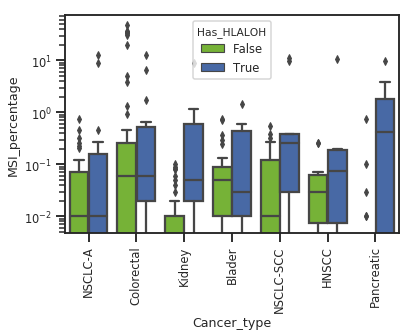

In [75]:
# MSI status
print('Pan-cancer:', sp.mannwhitneyu(data_df[data_df.Has_HLALOH].MSI_percentage,
               data_df[~data_df.Has_HLALOH].MSI_percentage))
print('With HLA LOH:', data_df[data_df.Has_HLALOH].MSI_percentage.median())
print('Without HLA LOH:', data_df[~data_df.Has_HLALOH].MSI_percentage.median())

for tumor_type in cancer_types:
    print(tumor_type, sp.mannwhitneyu(data_df[(data_df.Cancer_type == tumor_type)&data_df.Has_HLALOH].MSI_percentage,
           data_df[(data_df.Cancer_type == tumor_type)&~data_df.Has_HLALOH].MSI_percentage))

g = sns.boxplot(x='Cancer_type', y='MSI_percentage', hue='Has_HLALOH', data=data_df,
           order=cancer_types, palette=[green, blue])
plt.xticks(rotation=90)
g.set_yscale("log")
g.set(xticklabels=[cancer_type_map[x] for x in cancer_types])


### Oncovirus

In [76]:
# Oncovirus
oncoviruses = ['CMV', 'EBV', 'Fusobacterium_nucleatum', 'HBV_A', 'HBV_B', 'HBV_C', 
        'HBV_D', 'HBV_E', 'HBV_F', 'HBV_G', 'HBV_H', 'HPV_16', 'HPV_33', 'HPV_56']

In [77]:
data_df['HBV'] = data_df[['HBV_A', 'HBV_B', 'HBV_C', 
        'HBV_D', 'HBV_E', 'HBV_F', 'HBV_G', 'HBV_H']].sum(axis=1)
data_df['HPV'] = data_df[['HPV_16', 'HPV_33', 'HPV_56']].sum(axis=1)

In [78]:
# HBV
tumor_type = 'Liver'  
print('Total liver patients:', len(data_df[data_df.Cancer_type == 'Liver']))
print(tumor_type, sp.mannwhitneyu(data_df[(data_df.Cancer_type == tumor_type)&data_df.HBV > 0].Has_HLALOH,
       data_df[(data_df.Cancer_type == tumor_type)&data_df.HBV == 0].Has_HLALOH))
print(data_df[(data_df.Cancer_type == tumor_type)&data_df.HBV > 0].Has_HLALOH.mean(),
        data_df[(data_df.Cancer_type == tumor_type)&data_df.HBV == 0].Has_HLALOH.mean())


Total liver patients: 28
Liver MannwhitneyuResult(statistic=2450.0, pvalue=0.06861729894954298)
0.0 0.18196994991652754


In [79]:
data_df[data_df.Cancer_type == 'Liver'].Has_HLALOH.value_counts()

False    27
True      1
Name: Has_HLALOH, dtype: int64

In [80]:
# HPV
tumor_type = 'Cervical'      
print('Total Cervical patients:', len(data_df[data_df.Cancer_type == 'Cervical']))
print(tumor_type, sp.mannwhitneyu(data_df[(data_df.Cancer_type == tumor_type)&data_df.HPV > 0].Has_HLALOH,
       data_df[(data_df.Cancer_type == tumor_type)&data_df.HPV == 0].Has_HLALOH))
print(data_df[(data_df.Cancer_type == tumor_type)&data_df.HPV > 0].Has_HLALOH.mean(),
        data_df[(data_df.Cancer_type == tumor_type)&data_df.HPV == 0].Has_HLALOH.mean())


Total Cervical patients: 18
Cervical MannwhitneyuResult(statistic=1879.5, pvalue=0.23004767831455264)
0.2857142857142857 0.1777408637873754


In [81]:
# Fusobacterium_nucleatum
print('Overall:', sp.mannwhitneyu(data_df[data_df.Fusobacterium_nucleatum == 1].Has_HLALOH,
               data_df[data_df.Fusobacterium_nucleatum == 0].Has_HLALOH))
for tumor_type in ['Colorectal', 'Head_Neck']:      
    print(len(data_df[(data_df.Cancer_type == tumor_type)&data_df.Fusobacterium_nucleatum > 0]))
    print(tumor_type, sp.mannwhitneyu(data_df[(data_df.Cancer_type == tumor_type)&data_df.Fusobacterium_nucleatum > 0].Has_HLALOH,
               data_df[(data_df.Cancer_type == tumor_type)&data_df.Fusobacterium_nucleatum == 0].Has_HLALOH))
            

Overall: MannwhitneyuResult(statistic=8103.0, pvalue=0.006190185831936325)
26
Colorectal MannwhitneyuResult(statistic=6864.5, pvalue=0.11027448223133496)
7
Head_Neck MannwhitneyuResult(statistic=1270.5, pvalue=0.003259545494491064)


In [82]:
data_df[data_df.Fusobacterium_nucleatum == 1].Cancer_type.value_counts()

Colorectal              26
Head_Neck                7
NSCLC_adenocarcinoma     5
Melanoma                 4
Ovarian                  2
Kidney_RCC               1
Cervical                 1
Name: Cancer_type, dtype: int64

#### Plotting correlations

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


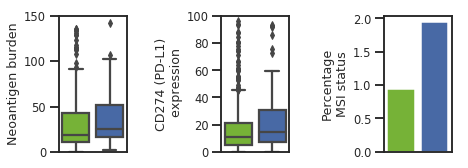

In [83]:
# Combine into a single figure
plt.figure(figsize=(8.5, 2.5))
sns.set_context('talk', font_scale=0.7)
gs = gridspec.GridSpec(1, 6) 

ax1 = plt.subplot2grid((1, 6), (0, 0))
sns.boxplot(x='HLA LOH', y='BINDING_antigen_strong_count', #ci=None,
            data=data_df, palette=[green, blue], order=[False, True])
plt.xticks(rotation=90)
plt.ylim(0, 150)
plt.legend().remove()
plt.xticks([])
plt.xlabel('')
plt.ylabel('Neoantigen burden')

ax3 = plt.subplot2grid((1, 6), (0, 2))
sns.boxplot(x='HLA LOH', y='CD274', #ci=None,
            data=data_df, palette=[green, blue], order=[False, True])
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.legend().remove()
plt.xticks([])
plt.xlabel('')
plt.ylabel('CD274 (PD-L1)\n expression')

ax4 = plt.subplot2grid((1, 6), (0, 4))
sns.barplot(x='HLA LOH', y='MSI_percentage', ci=None,
            data=data_df, palette=[green, blue], order=[False, True])
plt.xticks(rotation=90)
plt.legend().remove()
plt.xticks([])
plt.xlabel('')
plt.ylabel('Percentage\nMSI status')


plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.pan_correlations.2021_06_25.pdf',
           bbox_inches='tight')

In [84]:
# Saving source data
panel_name = 'figure_5efg'
data_df[['HLA LOH', 'BINDING_antigen_strong_count', 'CD274', 'MSI_percentage']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

##### Neoantigen trends

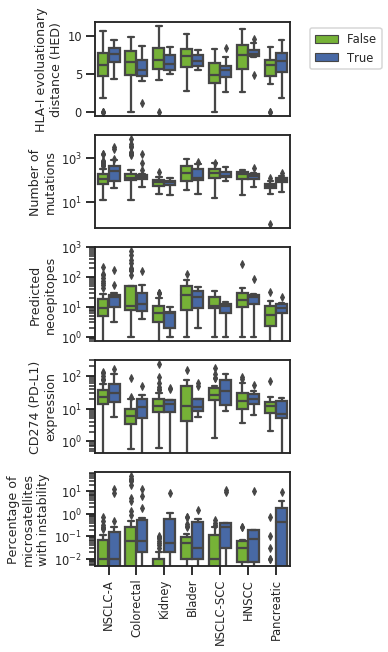

In [85]:
# Combine into a single figure
plt.figure(figsize=(3.5, 10))
sns.set_context('talk', font_scale=0.7)
gs = gridspec.GridSpec(5, 1) 


ax1 = plt.subplot2grid((5, 1), (0, 0))
sns.boxplot(x='Cancer_type', y='HED', hue='Has_HLALOH', 
            data=data_df, palette=[green, blue],
            order=cancer_types)
#g.set(xticklabels=['NSCLC-A', 'Breast', 'Melanoma', 'Colorectal', 'Head-neck'])
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.xticks([])
plt.xlabel('')
plt.ylabel('HLA-I evoluationary\ndistance (HED)')
#plt.tight_layout()


ax2 = plt.subplot2grid((5, 1), (1, 0))
sns.boxplot(x='Cancer_type', y='Potential_neoantigens', hue='Has_HLALOH', data=data_df, palette=[green, blue],
           order=cancer_types)
plt.ylabel('Number of\nmutations')
ax2.set(yscale="log")
#plt.ylim(0, 2000)
plt.xticks(rotation=90)
plt.xticks([])
plt.xlabel('')
plt.legend().remove()


ax3 = plt.subplot2grid((5, 1), (2, 0))
sns.boxplot(x='Cancer_type', y='PRESENTATION_epitope_strong_count', 
                 hue='Has_HLALOH', data=data_df, 
            palette=[green, blue],
           order=cancer_types)
ax3.set(yscale="log")
plt.xticks(rotation=90)
plt.ylabel('Predicted\nneoepitopes')
#plt.ylim(0, 200)
plt.xticks([])
plt.xlabel('')
plt.legend().remove()

ax4 = plt.subplot2grid((5, 1), (3, 0))
sns.boxplot(x='Cancer_type', y='CD274', 
                 hue='Has_HLALOH', data=data_df, 
            palette=[green, blue],
           order=cancer_types)
ax4.set(yscale="log")
plt.xticks(rotation=90)
plt.ylabel('CD274 (PD-L1)\nexpression')
#plt.ylim(0, 200)
plt.xticks([])
plt.xlabel('')
plt.legend().remove()

ax5 = plt.subplot2grid((5, 1), (4, 0))
sns.boxplot(x='Cancer_type', y='MSI_percentage', 
                 hue='Has_HLALOH', data=data_df, 
            palette=[green, blue],
           order=cancer_types)
ax5.set(yscale="log")
plt.xticks(rotation=90)
plt.ylabel('Percentage of\nmicrosatellites\nwith instability')
#plt.ylim(0, 200)
plt.legend().remove()

ax5.set(xticklabels=[cancer_type_map[x] for x in cancer_types])
plt.xlabel('')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/nextdb.HED_M_Neo.2021_06_25.pdf',
           bbox_inches='tight')

In [86]:
# Saving source data
panel_name = 'supp_figure_18bcdfg'
data_df[['Cancer_type', 'Has_HLALOH', 'HED', 'Potential_neoantigens', 'PRESENTATION_epitope_strong_count',
        'CD274', 'MSI_percentage']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

### Statstical test: are neoantigens allele-associated?

In [87]:
def get_sherpa_allele(x):
    try:
        return 'HLA-{0}{1}:{2}'.format(x.split('_')[1].upper(), x.split('_')[2], x.split('_')[3])
    except:
        return x

In [88]:
as_hla_loh_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/pancancer.dash_output.csv',
                        index_col=0)


In [89]:
as_hla_loh_df = as_hla_loh_df[~as_hla_loh_df['Sample'].str.contains('Post')]

In [90]:
as_hla_loh_df_with_loh = as_hla_loh_df[as_hla_loh_df.dash_deletion][['hla_locus', 'Sample']].drop_duplicates()

In [91]:
as_hla_loh_df['sherpa_allele'] = as_hla_loh_df['dash_allele'].apply(get_sherpa_allele)

In [92]:
as_hla_loh_df.head()

hla_locus  hla_locus_cntr        dash_allele hla_assign_allele  purity  \
0         A               1     hla_a_11_01_01        A*11:01:01    0.59   
1         A               2  hla_a_02_01_01_01     A*02:01:01:01    0.59   
2         B               1     hla_b_07_02_01        B*07:02:01    0.59   
3         B               2  hla_b_44_02_01_01     B*44:02:01:01    0.59   
4         C               1     hla_c_07_04_01        C*07:04:01    0.59   

   ploidy alternate_copy_number alternate_allelic_imbalance  \
0       2     0.954528661480121          0.1396995991856002   
1       2    1.1057150882186553          0.1396995991856002   
2       2    1.2609575305311944        5.46589459102549e-09   
3       2      0.92425847923387        5.46589459102549e-09   
4       2     1.217143898726644       0.0014113193379766864   

   alternate_deletion              dash_r  ... raw_dash_deletion  \
0               False  1.0101327646302274  ...             False   
1               False   0.978562589275474  ...             False   
2               False  1.1222587728426323  ...             False   
3               False  1.0166830101556927  ...             False   
4               False  1.1476173426890357  ...             False   

   dash_deletion  sequenza_majors  sequenza_minors  consistency_of_coverage  \
0          False              1.0              1.0                 0.562500   
1          False              1.0              1.0                 0.562500   
2          False              1.0              1.0                 0.586957   
3          False              1.0              1.0                 0.586957   
4          False              1.0              1.0                 0.608696   

   total_coverage  prediction_probability  secondary_check          Sample  \
0        1.958065                0.001676             True  DNA_S000460823   
1        1.958065                0.001676             True  DNA_S000460823   
2        2.153896                0.001239             True  DNA_S000460823   
3        2.153896                0.001239             True  DNA_S000460823   
4        2.376238                0.001102             True  DNA_S000460823   

  sherpa_allele  
0    HLA-A11:01  
1    HLA-A02:01  
2    HLA-B07:02  
3    HLA-B44:02  
4    HLA-C07:04  

[5 rows x 21 columns]

In [93]:
data_df.head()

sample_name_tumor AJCC_UICC_Stage_Group Cancer_type Simple_Stage  purity  \
0     DNA_S000460823                    II     Bladder           II    0.59   
1   DNA_D00689998_A1                    IV    Melanoma           IV    0.39   
2   DNA_D00689957_A1                   III  Colorectal          III    0.50   
3  DNA_D00689946_A2a                   III  Pancreatic          III    0.16   
4     DNA_S000465410                    II     Uterine           II    0.31   

   MATH  MSI_percentage  Cytolytic_score    CD274    CASP8  ...  \
0   NaN            0.03         7.313060   7.6641  29.6656  ...   
1   NaN            0.00         2.910320   2.4225  13.2090  ...   
2   NaN            0.65         4.947471  12.9711  22.0157  ...   
3   NaN            0.00         9.277136  15.6070  16.9710  ...   
4   NaN            0.88        11.480447   5.8557  15.0401  ...   

   BINDING_epitope_strong_count  PRESENTATION_antigen_strong_count  \
0                           NaN                                NaN   
1                           NaN                                NaN   
2                           NaN                                NaN   
3                           NaN                                NaN   
4                           NaN                                NaN   

   PRESENTATION_epitope_strong_count  Has_HLALOH  Allele_lost_A  \
0                                NaN       False              0   
1                                NaN       False              0   
2                                NaN        True              1   
3                                NaN       False              0   
4                                NaN       False              0   

   Allele_lost_B Allele_lost_C  HLA LOH  HBV  HPV  
0              0             0    False  0.0  0.0  
1              0             0    False  0.0  0.0  
2              1             1     True  0.0  0.0  
3              0             0    False  0.0  0.0  
4              0             0    False  0.0  0.0  

[5 rows x 755 columns]

In [94]:
# for patient, gene combination with LOH:
model = 'BINDING'
kept_neos, lost_neos, sample_neos, tt_neos = [], [], [], []
for sample, gene in zip(list(as_hla_loh_df_with_loh['Sample'][:]),
                        list(as_hla_loh_df_with_loh.hla_locus)[:]):
    try:
    
        if len(as_hla_loh_df[(as_hla_loh_df['Sample'] == sample)&
                             (as_hla_loh_df.hla_locus == gene)&(as_hla_loh_df.dash_deletion)]) == 1:
            # Get the lost and kept alleles
            lost_allele = list(as_hla_loh_df[(as_hla_loh_df['Sample'] == sample)&
                                             (as_hla_loh_df.hla_locus == gene)&
                                             (as_hla_loh_df.dash_deletion)].sherpa_allele)[0]
            kept_allele = list(as_hla_loh_df[(as_hla_loh_df['Sample'] == sample)&
                                             (as_hla_loh_df.hla_locus == gene)&
                                             (~as_hla_loh_df.dash_deletion)].sherpa_allele)[0]
            #print(lost_allele, kept_allele)

            # Number of neoantigens for kept and lost alleles
            neo_df = pd.read_csv('/rnd/users/rpyke/data/03-public_MS/applications/NeXTDB/merged_output/{0}.{1}.all.tab'.format(sample, model), 
                         sep='\t')
            tt_neos.append(list(data_df[data_df.sample_name_tumor == sample].Cancer_type)[0])
            kept_neos.append(len(neo_df[(neo_df.allele == kept_allele)&(neo_df.sherpa_calibrated < 0.5)]))
            lost_neos.append(len(neo_df[(neo_df.allele == lost_allele)&(neo_df.sherpa_calibrated < 0.5)]))
            sample_neos.append(sample)
    except:
        print(sample)

DNA_D00689957_A1
DNA_D00689957_A1
DNA_D00689957_A1
DNA_C00084278_1ba
DNA_D00689995_A1
DNA_D00689995_A1
DNA_D00689995_A1
DNA_D00689924_A
DNA_S000454926
DNA_S000454926
DNA_S000454926
DNA_S000443727
DNA_S000443727
DNA_S000443727


Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.


DNA_8472
DNA_S000439058
DNA_S000439058
DNA_246430
DNA_246430
DNA_S000449923
DNA_S000449913
DNA_S000449913
DNA_S000449913
DNA_S000449909
DNA_2NHVSAZI
DNA_2NHVSAZI
DNA_2NHVSAZI
DNA_QV2WNZ22
DNA_QV2WNZ22
DNA_QV2WNZ22
DNA_P98N5ARW
DNA_P98N5ARW
DNA_MBQQKA1D
DNA_MBQQKA1D
DNA_X3RYSA99
DNA_X3RYSA99
DNA_X3RYSA99
DNA_YOXMEA1E
DNA_YOXMEA1E
DNA_YOXMEA1E
DNA_ONVFVASX
DNA_ONVFVASX
DNA_ONVFVASX
DNA_RVPQPAPO
DNA_RVPQPAPO
DNA_RVPQPAPO
DNA_YINHDAYU
DNA_XCZ4EASP
DNA_KW15AA5Y
DNA_ILS32847PD9
DNA_ILS32847PD9
DNA_ILS32847PD9
DNA_124768F-5013
DNA_124768F-5013
DNA_1134036FA1-5013
DNA_1134036FA1-5013
DNA_1134036FA1-5013


In [95]:
len(kept_neos), len(lost_neos), len(sample_neos), len(tt_neos)

(180, 180, 180, 180)

In [96]:
neo_selection_df = pd.DataFrame({'Neoepitopes': kept_neos + lost_neos,
             'Allele Status': ['Kept' for x in kept_neos] + ['Lost' for x in lost_neos],
             'Patient': sample_neos + sample_neos,
            'Cancer_type': tt_neos + tt_neos})

neo_selection_df_ref = pd.merge(neo_selection_df[neo_selection_df['Allele Status'] == 'Kept'][['Patient', 'Cancer_type', 'Neoepitopes']],
         neo_selection_df[neo_selection_df['Allele Status'] == 'Lost'][['Patient', 'Neoepitopes']],
         on=['Patient'])

neo_selection_df_ref = neo_selection_df_ref.rename(columns={'Neoepitopes_x': 'Neoepitopes_Kept', 'Neoepitopes_y': 'Neoepitopes_Lost'})

neo_selection_df_ref['Ratio'] = np.log(neo_selection_df_ref.Neoepitopes_Lost / neo_selection_df_ref.Neoepitopes_Kept)

In [97]:
neo_selection_df.groupby('Allele Status').describe()

Neoepitopes                                                     
                    count       mean        std  min   25%   50%    75%    max
Allele Status                                                                 
Kept                180.0  64.033333  93.212912  1.0  17.0  30.0  68.50  521.0
Lost                180.0  67.322222  98.602336  2.0  17.0  33.5  68.25  503.0

In [98]:
sp.wilcoxon(list(neo_selection_df[neo_selection_df['Allele Status'] == 'Kept'].Neoepitopes),
               list(neo_selection_df[neo_selection_df['Allele Status'] == 'Lost'].Neoepitopes))

WilcoxonResult(statistic=5998.5, pvalue=0.011186492231339117)

In [99]:
for cancer_type in cancer_types:
    print(cancer_type, round(sp.wilcoxon(list(neo_selection_df[(neo_selection_df.Cancer_type == cancer_type)&(neo_selection_df['Allele Status'] == 'Kept')].Neoepitopes),
               list(neo_selection_df[(neo_selection_df.Cancer_type == cancer_type)&(neo_selection_df['Allele Status'] == 'Lost')].Neoepitopes))[1], 3))

NSCLC_adenocarcinoma 0.104
Colorectal 0.573
Kidney_RCC 0.152
Bladder 0.157
NSCLC_SCC 0.713
Head_Neck 0.955
Pancreatic 0.925
